# SVM & Naive bayes

##Theoretical Question

1. What is a Support Vector Machine (SVM)?

Answer -- SVM is a supervised learning algorithm used for classification and regression. It works by finding the best separating hyperplane between classes by maximizing the margin. It performs very well in high-dimensional and complex datasets.

 2. What is the difference between Hard Margin and Soft Margin SVM?

 Answer --
* Hard Margin:
Assumes data is perfectly separable. No misclassification is allowed. Very sensitive to noise and outliers.

* Soft Margin:
Allows some errors using a penalty. Handles real-world noisy data better. Uses a parameter C to control the trade-off between margin width and misclassifications.





3. What is the mathematical intuition behind SVM?

Answer -- SVM tries to maximize the distance between the hyperplane and the closest points (support vectors). This maximizes the margin, which leads to better generalization. It solves a convex optimization problem with constraints.

4. What is the role of Lagrange Multipliers in SVM?

Answer -- Lagrange multipliers help convert the constrained optimization problem of SVM into a dual form, which is easier to compute. This dual form allows the use of kernel functions and identifies support vectors.

5. What are Support Vectors in SVM?

Answer -- Support vectors are the data points that lie closest to the decision boundary. They directly influence the position of the hyperplane. Removing them changes the model, while removing other points does not.

6. What is a Support Vector Classifier (SVC)?

Answer -- SVC is the classification version of SVM. It finds the optimal hyperplane to classify data into categories using linear or non-linear kernels.

 7. What is a Support Vector Regressor (SVR)?

 Answer -- SVR is the regression version of SVM. Instead of separating classes, it tries to fit the data within a tube called the ε-insensitive margin, predicting continuous values.

8. What is the Kernel Trick in SVM?

Answer --The kernel trick allows SVM to handle non-linear data by transforming it into higher dimensions without actually computing the transformation. This makes SVM efficient for complex patterns.

 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

 Answer --
* Linear Kernel:
Works when data is linearly separable. Fast and simple.

* Polynomial Kernel:
Captures curved decision boundaries. Useful when interactions between features matter.

* RBF Kernel:
Most flexible. Handles highly non-linear data. Very common in real-world tasks.

10. What is the effect of the C parameter in SVM?

Answer --C controls the trade-off between having a wide margin and misclassifying points:

High C: Model tries to avoid misclassification → may overfit.

Low C: Model allows more misclassification → smoother decision boundary.

11. What is the role of the Gamma parameter in RBF Kernel SVM?

Answer -- Gamma defines how far the influence of a single training example reaches:

High gamma: Only nearby points affect the boundary → complex model → overfitting.

Low gamma: Larger influence → smoother model → may underfit.

 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?

 Answer -- Naïve Bayes is a probabilistic classifier based on Bayes’ theorem. It assumes all features are independent, which is rarely true, making it “naïve.” Despite this, it performs very well in many tasks.

13. What is Bayes’ Theorem?

Answer --Bayes’ Theorem calculates the probability of an event given prior knowledge.


P(A∣B)=
P(B∣A)P(A)/P(B)
	​


It updates our belief based on new evidence.

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?

Answer -- Gaussian vs Multinomial vs Bernoulli Naïve Bayes

* Gaussian NB: For continuous features (e.g., height, weight).

* Multinomial NB: For count data like word frequencies in text.

* Bernoulli NB: For binary features (word present or not).

 15. When should you use Gaussian Naïve Bayes over other variants?

 Answer --Use Gaussian NB when the features are continuous and approximately follow a normal distribution, such as medical measurements or sensor readings.

16. What are the key assumptions made by Naïve Bayes?

ANswer -- Key Assumptions of Naïve Bayes

* All features are independent.

* Each feature contributes equally to the outcome.

* Features must not depend on each other.

17. What are the advantages and disadvantages of Naïve Bayes?

Answer --Advantages & Disadvantages of Naïve Bayes

Advantages

* Very fast and simple

* Works well with high-dimensional data

* Performs well with text and NLP tasks

* Requires less training data

Disadvantages

* Assumes independence → often unrealistic

* Not good when features are correlated

* Probability estimates can be poor

18. Why is Naïve Bayes a good choice for text classification?

Answer -- Text data is high-dimensional and sparse. Naïve Bayes handles this well because it uses word counts/probabilities. It is fast, scalable, and works great for spam detection, sentiment analysis, and document classification.

19. Compare SVM and Naïve Bayes for classification tasks?

Amswer -- Compare SVM and Naïve Bayes

SVM:
More accurate, handles complex boundaries, but computationally heavier and needs parameter tuning.

NB:
Very fast, good with text, simple assumptions, may be less accurate when features correlate.

 20. How does Laplace Smoothing help in Naïve Bayes?

 Answer --Laplace smoothing adds 1 to all word counts so that unseen words don't get probability zero. This prevents the entire probability product from becoming zero during prediction.

##Practical

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies

In [29]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
acc_linear = accuracy_score(y_test, svm_linear.predict(X_test))


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

print("Linear Kernel Accuracy:", acc_linear)
print("RBF Kernel Accuracy:", acc_rbf)


Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE)

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


housing = fetch_california_housing()
X = housing.data
y = housing.target

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.3570026426754463


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary

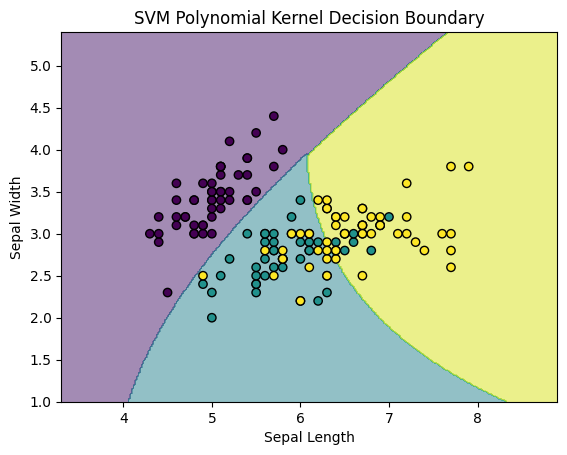

In [31]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("SVM Polynomial Kernel Decision Boundary")
plt.show()


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9415204678362573


 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset

In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all')
X_text = data.data
y = data.target

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8443579766536965


27. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually

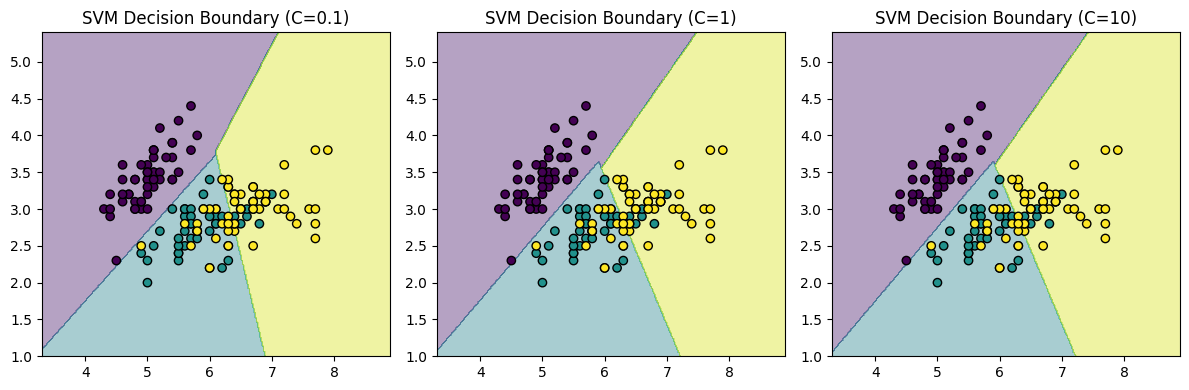

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C_values = [0.1, 1, 10]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"SVM Decision Boundary (C={C})")

plt.tight_layout()
plt.show()



28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features

In [35]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = np.random.randint(0, 2, size=(200, 5))
y = np.random.randint(0, 2, size=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.45


29. Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm1 = SVC()
svm1.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, svm1.predict(X_test))

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svm2 = SVC()
svm2.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, svm2.predict(X_test_s))

print("Unscaled Accuracy:", acc_unscaled)
print("Scaled Accuracy:", acc_scaled)


Unscaled Accuracy: 1.0
Scaled Accuracy: 1.0


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing=

In [37]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

X = np.array([[1, 2], [1, 3], [2, 2], [2, 3]])
y = np.array([0, 0, 1, 1])

gnb = GaussianNB()
gnb.fit(X, y)
print("Predictions without smoothing:", gnb.predict(X))

gnb_smooth = GaussianNB(var_smoothing=1e-1)
gnb_smooth.fit(X, y)
print("Predictions with smoothing:", gnb_smooth.predict(X))


Predictions without smoothing: [0 0 1 1]
Predictions with smoothing: [0 0 1 1]


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel

In [38]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

data = load_iris()
X, y = data.data, data.target

params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9800000000000001


32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy

In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=500, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_normal = SVC()
svm_normal.fit(X_train, y_train)
print("Normal Accuracy:", accuracy_score(y_test, svm_normal.predict(X_test)))

svm_weight = SVC(class_weight="balanced")
svm_weight.fit(X_train, y_train)
print("Weighted Accuracy:", accuracy_score(y_test, svm_weight.predict(X_test)))


Normal Accuracy: 0.9133333333333333
Weighted Accuracy: 0.9133333333333333


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data=

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

texts = [
    "win money now", "free offer", "click here", "hello friend",
    "meeting today", "discount available", "call now", "project update"
]
labels = [1, 1, 1, 0, 0, 1, 1, 0]  # 1 = spam, 0 = ham

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.3333333333333333


 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, svm.predict(X_test))

nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = accuracy_score(y_test, nb.predict(X_test))

print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 0.9777777777777777


35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
acc_before = accuracy_score(y_test, nb1.predict(X_test))

selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.3, random_state=42)
nb2 = GaussianNB()
nb2.fit(X_train2, y_train2)
acc_after = accuracy_score(y_test2, nb2.predict(X_test2))

print("Accuracy Before FS:", acc_before)
print("Accuracy After FS:", acc_after)


Accuracy Before FS: 0.9415204678362573
Accuracy After FS: 0.9532163742690059


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy

In [43]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# OvR
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr.predict(X_test))

# OvO
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
acc_ovo = accuracy_score(y_test, ovo.predict(X_test))

print("OvR Accuracy:", acc_ovr)
print("OvO Accuracy:", acc_ovo)


OvR Accuracy: 0.7222222222222222
OvO Accuracy: 0.7962962962962963


37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    clf = SVC(kernel=k, random_state=42)
    clf.fit(X_train, y_train)
    print(f"{k} kernel accuracy:", accuracy_score(y_test, clf.predict(X_test)))


linear kernel accuracy: 0.9649122807017544
poly kernel accuracy: 0.9415204678362573
rbf kernel accuracy: 0.935672514619883


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy

In [45]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

data = load_wine()
X, y = data.data, data.target

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf = SVC(kernel='rbf', random_state=42)
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print("Fold accuracies:", np.round(scores, 3))
print("Average accuracy:", np.round(scores.mean(), 3))


Fold accuracies: [0.639 0.694 0.639 0.657 0.743]
Average accuracy: 0.674


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance

In [46]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# default priors (learned)
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
print("Default priors accuracy:", accuracy_score(y_test, gnb_default.predict(X_test)))

# custom priors (example: uniform)
num_classes = len(set(y))
uniform_priors = [1/num_classes]*num_classes
gnb_uniform = GaussianNB(priors=uniform_priors)
gnb_uniform.fit(X_train, y_train)
print("Uniform priors accuracy:", accuracy_score(y_test, gnb_uniform.predict(X_test)))

# skewed priors example (favor class 0)
skewed = [0.7] + [(0.3/(num_classes-1))]*(num_classes-1)
gnb_skew = GaussianNB(priors=skewed)
gnb_skew.fit(X_train, y_train)
print("Skewed priors accuracy:", accuracy_score(y_test, gnb_skew.predict(X_test)))


Default priors accuracy: 0.9777777777777777
Uniform priors accuracy: 0.9777777777777777
Skewed priors accuracy: 0.9777777777777777


40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Baseline SVM
clf_base = SVC(kernel='linear', random_state=42)
clf_base.fit(X_train, y_train)
print("Baseline accuracy:", accuracy_score(y_test, clf_base.predict(X_test)))

# RFE (select top 10 features)
selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10, step=1)
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

clf_rfe = SVC(kernel='linear', random_state=42)
clf_rfe.fit(X_train_sel, y_train)
print("After RFE accuracy:", accuracy_score(y_test, clf_rfe.predict(X_test_sel)))


Baseline accuracy: 0.9649122807017544
After RFE accuracy: 0.9298245614035088


 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy

In [48]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     0.6333    0.9048    0.7451        21
           2     0.6000    0.2143    0.3158        14

    accuracy                         0.7593        54
   macro avg     0.7444    0.7063    0.6870        54
weighted avg     0.7537    0.7593    0.7235        54



42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss)

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
probs = gnb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.48986013210958873


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn=

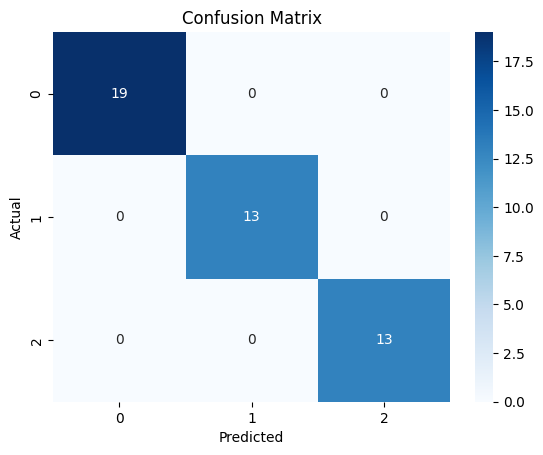

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 0.39859828301457567


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
probs = gnb.predict_proba(X_test)[:, 1]  # probability of positive class
print("ROC-AUC:", roc_auc_score(y_test, probs))


ROC-AUC: 0.9922104644326867


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

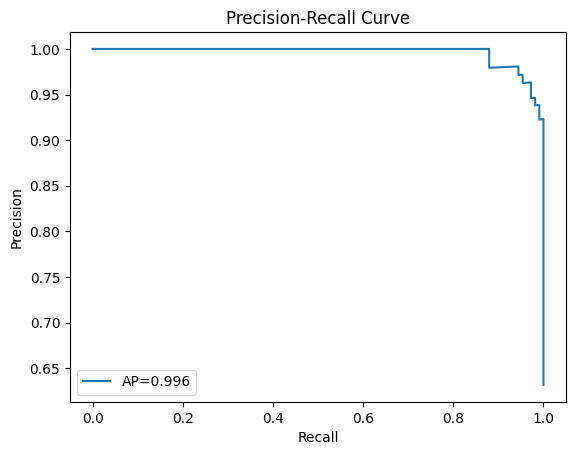

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel='rbf', probability=True, random_state=42)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:, 1]

prec, rec, _ = precision_recall_curve(y_test, probs)
avg_prec = average_precision_score(y_test, probs)

plt.plot(rec, prec, label=f'AP={avg_prec:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
